<b>NumPy</b> and <b>Pandas</b> simplify analyzing and manipulating data  
<b>Matplotlib</b> provides attractive data visualizations  
<b>Scikit-learn</b> offers simple and effective predictive data analysis  
<b>TensorFlow</b> and <b>PyTorch</b> supply machine learning and deep learning capabilities

How to **parse the dates** at the time of loading data  
<code> df = pandas.read_csv('data.csv', parse_dates=['date'])</code>

**Filter** the data based on the **date**  
* <code>df = df[[d.month == 1 for d in df.date]].copy()</code>  
fetch only the january month data  
* <code>df = df[[d.month < 7 for d in df.date]].copy()</code>  
fetch only the 1 to 6 months data

club the yearly data into a fraction of day of year from a specific date  
<code>df["years_since_1990"] = [(d.year + d.timetuple().tm_yday / 365.25) - 1990 for d in df.date]</code>

<b>Normalize</b> scale and offset the data column  
<code>df["normalised_temperature"] = (df["min_temperature"] - np.mean(df["min_temperature"])) / np.std(df["min_temperature"])</code>

To show the march $1^{st}$ of 1990  
<code>from datetime import datetime  
print(datetime(1990,3,1)) # yyyy,mm,dd</code>

Filter data based on list of dates  
<code>desired_dates = [  
    datetime(1950,2,1),  
    datetime(1960,2,1),  
    datetime(1970,2,1),  
    datetime(1980,2,1),  
]  
  
df = df[df.date.isin(desired_dates)].copy()</code>

Find the missing data

[titanic data](https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv)

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index_col=False, sep=",", header=0)
missing_data = df.isnull().sum().to_frame()  
missing_data = missing_data.rename(columns={0:'Empty Cells'})  
print(missing_data)

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               2


In [5]:
# records which are having missing values
df[df.isna().any(axis=1)]
# for simplicity lets consider only missing values in Embarked
df[df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [2]:
# info of about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


here numerical types are  
int64, float64  
categorical types are  
object

<AxesSubplot:>

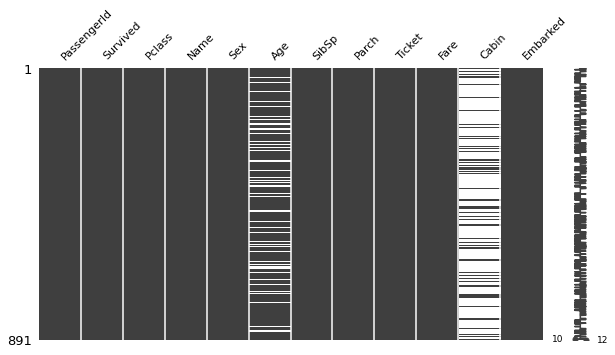

In [3]:
import missingno as msno
msno.matrix(df, figsize=(10,5), fontsize=11)

In [4]:
# combine two or more filter conditions

missing_age = df["Age"].isnull()
missing_cabin = df["Cabin"].isnull()
unknown_age_and_cabin = df[missing_age & missing_cabin].copy()

In [6]:
# drop columns from data, axis=1
df = df.drop(["PassengerId", "Name", "Ticket"], axis=1)

#### Option 1  
drop the missing data

In [9]:
# removing all the records which are having aleast one null value
df.dropna(axis=0,how='any').shape

(183, 12)

In [5]:
# remove the records which are having Embarked column as null values
clean_dataset = df.dropna(subset=["Embarked"]).copy()
clean_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Option 2  
impute the missing data with mean


In [6]:
# calculate the mean of numerical data only for those where the Age>0
# cause there may be the null values which are recorded as the 0
# these 0 valued records will effect the mean of the data

mean_age = clean_dataset[clean_dataset.Age>0]['Age'].mean()
clean_dataset["Age"] = clean_dataset["Age"].fillna(mean_age).replace({0:mean_age})

#### Option 3  
Assign a new category to unknown categorical data

In [7]:
# Assign unknow to records where "Cabin" is empty
clean_dataset["Cabin"] = clean_dataset["Cabin"].fillna("Unknown")

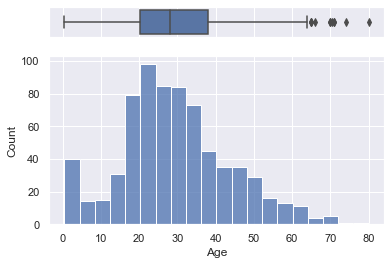

In [3]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
# df = sns.load_dataset("iris")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(x=df["Age"], ax=ax_box)
sns.histplot(data=df,x="Age", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

In [4]:
import plotly.express as px
fig = px.histogram(df, x="Age", y="Survived", histfunc='avg', marginal = 'box')
fig.show()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

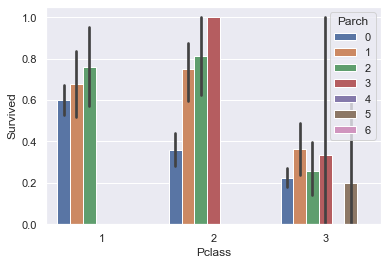

In [10]:
sns.barplot(data=clean_dataset,x="Pclass",y='Survived',hue="Parch")

In [5]:
fig = px.histogram(df, x="Pclass", y="Survived", histfunc='avg',color="Parch")
fig.update_layout(barmode='group')
fig.show()

<AxesSubplot:xlabel='Pclass', ylabel='SibSp'>

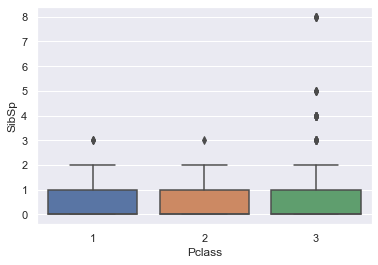

In [12]:
sns.boxplot(data=clean_dataset,x="Pclass",y="SibSp")

In [13]:
fig = px.box(data_frame=clean_dataset,x="Pclass",y="SibSp")
fig.show()

<AxesSubplot:xlabel='Age', ylabel='Fare'>

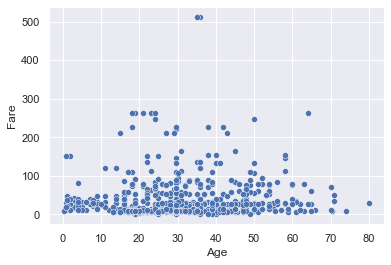

In [14]:
sns.scatterplot(data=clean_dataset,x="Age",y="Fare")

In [15]:
fig = px.scatter(data_frame=clean_dataset,x="Age",y="Fare")
fig.show()

In [16]:
clean_dataset['total']=1
fig = px.sunburst(clean_dataset, path=['Pclass','Sex','Survived','Embarked'], values='total')
fig.show()

In [17]:
import numpy as np
table = df.groupby(['Embarked','Sex'])['Survived'].agg([np.mean,'count']).reset_index().copy()
table.columns = table.columns.map({'Embarked':'Port','Sex':'Sex','mean':'Survival_rate','count':'Passenger_count'})
# table
fig = px.scatter(data_frame=table,x='Sex',y='Port',size='Passenger_count',size_max=80,color='Survival_rate')
fig.show()

## Feature engineering  
### one-hot encoding or dummy variables  
Find out which categorical variables will add value to model  
We can find these cat-columns by a simple procedure  
* get all the numerical variables in dataset and find log-loss w.r.t o/p  
* now try adding one of the cat-column in one-hot form and find log-loss  
* if the log-loss decreases then that cat-column adds value to model  
* if not then it is not adding value to o/p

In [7]:
df = df.dropna(subset=["Age"]).copy()

In [11]:
# calculating the logistic regression loss
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
features = ["Age", "Pclass", "SibSp", "Parch", "Fare"] 
X = df[features]
y = df.Survived
model = LogisticRegression(random_state=0, max_iter=2000).fit(X, y)
# calculate loss
probabilities = model.predict_proba(df[features])
loss = metrics.log_loss(df.Survived, probabilities)
loss

0.5708751873549369

In [8]:
# creating function for loss calculation
import pandas as pd
from typing import List
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, model_selection
def titanic_log_loss(all_data:pd.DataFrame,features:List[str]):
    # splitting data into train an test datasets
    train, test = model_selection.train_test_split(all_data,test_size=0.3, random_state=0)
    X = train[features]
    y = train.Survived
    model =  LogisticRegression(random_state=0, max_iter=2000).fit(X, y)
    # calculate loss
    probabilities = model.predict_proba(test[features])
    loss = metrics.log_loss(test.Survived, probabilities)
    return loss

In [25]:
# only numerical data loss
features = ["Age", "Pclass", "SibSp", "Parch", "Fare"] 
numeric_loss = titanic_log_loss(df,features)
numeric_loss

0.5983936612258052

numerical log-loss

In [26]:
# adding cat-variable Sex as binary
df['IsFemale'] = df['Sex'].replace({'male':0,'female':1})
features = ["Age", "Pclass", "SibSp", "Parch", "Fare", 'IsFemale']
loss_Binary_category = titanic_log_loss(df,features)
loss_Binary_category

0.44813325444268254

$\implies$ It reduced the log loss then this variable is important

In [27]:
# converting cat-variable Pclass into one-hot
print(df['Pclass'].unique())
pclass_one_hot = pd.get_dummies(df, columns=['Pclass'],drop_first=False).copy()
pclass_one_hot['Pclass'] = df.Pclass
print(pclass_one_hot.columns)

features = ["Age", "SibSp", "Parch", "Fare", 'IsFemale', 'Pclass_1', 'Pclass_2', 'Pclass_3']
loss_pclass_categorical = titanic_log_loss(pclass_one_hot,features)
loss_pclass_categorical

[3 1 2]
Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'IsFemale', 'Decks', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Pclass'],
      dtype='object')


0.44887192799227477

$\implies$ It slightly worsen the model

In [51]:
print(f"distinct cabins: {len(df['Cabin'].unique())}")
df['Cabin'].unique()

distinct cabins: 135


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'D33', 'B30', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'D47', 'B86',
       'F2', 'C2', 'B19', 'A7', 'C49', 'F4', 'B4', 'B80', 'A31', 'D36',
       'D15', 'C93', 'C78', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125',
       'C99', 'C118', 'D7', 'B49', 'D', 'C22 C26', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'E33', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'C52',
       'E44', 'A34', 'C104', 'C111', 'C92', 'E38', 'E12', 'E63', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',
       'C90', 'C126', 'C45', 'E8', 'B101', 'C46', 'D30', 'E121', 'D11',
       'E

In [28]:
Cabin_one_hot = pd.get_dummies(df,columns=['Pclass','Cabin'],drop_first=False).copy()
cab_col = list(x for x in Cabin_one_hot.columns if x.startswith('Cabin_'))
features = ["Age", "SibSp", "Parch", "Fare", 'IsFemale', 'Pclass_1', 'Pclass_2', 'Pclass_3']+cab_col
loss_cabin_categorical = titanic_log_loss(Cabin_one_hot,features)
loss_cabin_categorical

0.4423549981081906

$\implies$ It is the best score so far

In genereal having large number of columns doesn't always do good for the model, lets try to reduces these number of columns  
by considering only the decks instead of all cabins  

In [17]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       529
Embarked      2
IsFemale      0
dtype: int64

In [18]:
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [29]:
df['Decks'] = df.Cabin.apply(lambda c: c[0])
print(f"Decks: {df['Decks'].unique()}")
decks_one_hot = pd.get_dummies(df,columns=['Pclass','Decks'],drop_first=False)
deck_col = list(c for c in decks_one_hot.columns if c.startswith('Decks_'))
features = ["Age", "SibSp", "Parch", "Fare", 'IsFemale', 'Pclass_1', 'Pclass_2', 'Pclass_3']+deck_col
loss_deck_categorical = titanic_log_loss(decks_one_hot,features)
loss_deck_categorical

Decks: ['U' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


0.444756564287514

Comparing all the models

In [30]:
list = [['Numeric features only ',numeric_loss],
        ['Adding Sex as Binary',loss_Binary_category],
        ['Pclass as Binary',loss_pclass_categorical],
        ['Using Cabin as Categorical',loss_cabin_categorical],
        ['Using Deck as instead of Cabin',loss_deck_categorical]]
pd.DataFrame(list,columns=['Dataset','Log-Loss (Low is better)'])

,Dataset,Log-Loss (Low is better)
0,Numeric features only,0.598394
1,Adding Sex as Binary,0.448133
2,Pclass as Binary,0.448872
3,Using Cabin as Categorical,0.442355
4,Using Deck as instead of Cabin,0.444757


In [15]:
df_students = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv',delimiter=',',header='infer')

In [12]:
# the mean grades of students whose grades are above average
mean_study = df_students['StudyHours'].mean()
df_students[df_students.StudyHours > mean_study].Grade.mean()

66.7

In [16]:
# Adding Pass column: passing grade is 60
passes  = pd.Series(df_students['Grade'] >= 60)
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)

df_students.head()

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False


In [17]:
# now calculating the pass and fail counts
df_students.groupby('Pass')['Name'].count()

Pass
False    17
True      7
Name: Name, dtype: int64

In [21]:
# finding relation between Pass, Studyhours and Grade
df_students.groupby('Pass')['StudyHours','Grade'].mean()

C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,StudyHours,Grade
Pass,,
False,8.734375,38.000000
True,14.250000,73.142857


In [24]:
# Sorting based on the Grades
df_students.sort_values('Grade',ascending=False).head()

,Name,StudyHours,Grade,Pass
3,Rosie,16.0,97.0,True
10,Francesca,15.5,82.0,True
9,Giovanni,14.5,74.0,True
14,Jenny,15.5,70.0,True
21,Aisha,12.0,64.0,True


In [25]:
# clean the data
df_students = df_students.dropna(axis=0,how='any')

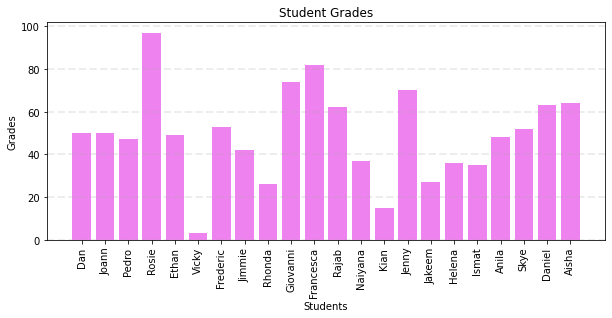

In [44]:
# bar plot of Name vs Grade
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,4))
plt.bar(x='Name',height='Grade',data=df_students, color='violet')

plt.title('Student Grades')
plt.xlabel('Students')
plt.ylabel('Grades')
plt.grid(axis='y',alpha=0.2,linestyle='--',linewidth='2',color='#AEA9A8')
plt.xticks(rotation=90)

plt.show()

C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


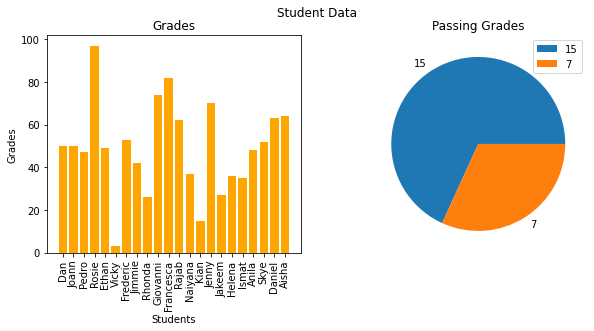

In [111]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].bar(x='Name',height='Grade',data=df_students,color='orange')
ax[0].set_title('Grades')
ax[0].set_xlabel('Students')
ax[0].set_ylabel('Grades')
ax[0].set_xticklabels(df_students.Name,rotation=90)

passing_count = df_students.Pass.value_counts()
ax[1].pie(passing_count,labels=passing_count)
ax[1].set_title('Passing Grades')
ax[1].legend(passing_count)

fig.suptitle('Student Data')

plt.show()

Minimum: 3.00
Mean: 49.18
Median: 49.50
Mode: 50.00
Max: 97.00


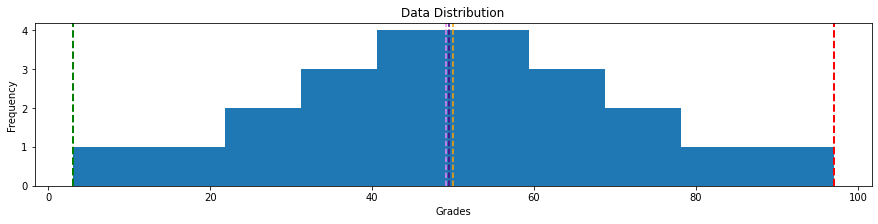

In [136]:
var_data = df_students.Grade

min_value = var_data.min()
mean_value = var_data.mean()
median_value = var_data.median()
mode_value = var_data.mode()
max_value = var_data.max()

print('Minimum: {:.2f}\nMean: {:.2f}\nMedian: {:.2f}\nMode: {:.2f}\nMax: {:.2f}'.format(\
    min_value,mean_value,median_value,mode_value[0],max_value))

fig = plt.figure(figsize=(15,3))

plt.hist(var_data)

plt.title('Data Distribution')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.axvline(mean_value,color='Violet',linestyle='--',linewidth=1.5)
plt.axvline(median_value,color='Indigo',linestyle='--',linewidth=1.5)
plt.axvline(mode_value[0],color='Orange',linestyle='--',linewidth=1.5)
plt.axvline(min_value,color='Green',linestyle='--',linewidth=2)
plt.axvline(max_value,color='Red',linestyle='--',linewidth=2)

plt.show()

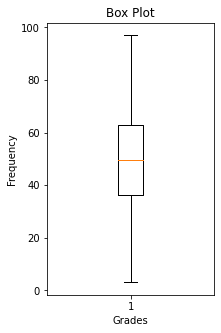

In [135]:
fig = plt.figure(figsize=(3,5))

plt.boxplot(var_data)
plt.title('Box Plot')
plt.ylabel('Frequency')
plt.xlabel('Grades')

plt.show()

In [4]:
def show_distribution(var_data):
    min_value = var_data.min()
    mean_value = var_data.mean()
    median_value = var_data.median()
    mode_value = var_data.mode()
    max_value = var_data.max()

    print('Minimum: {:.2f}\nMean: {:.2f}\nMedian: {:.2f}\nMode: {:.2f}\nMax: {:.2f}'.format(\
        min_value,mean_value,median_value,mode_value[0],max_value))

    fig,ax = plt.subplots(2,1,figsize=(10,5))

    ax[0].hist(var_data)

    # ax[0].set_title('Data Distribution')
    ax[0].set_ylabel('Frequency')
    ax[0].axvline(mean_value,color='yellow',linestyle='--',linewidth=2)
    ax[0].axvline(median_value,color='red',linestyle='--',linewidth=2)
    ax[0].axvline(mode_value[0],color='cyan',linestyle='--',linewidth=2)
    ax[0].axvline(min_value,color='Green',linestyle='--',linewidth=2)
    ax[0].axvline(max_value,color='orange',linestyle='--',linewidth=2)
    
    ax[1].boxplot(var_data,vert=False)
    ax[1].set_xlabel('value')
    
    fig.suptitle('Data Distribution')

    plt.show()


In [ ]:
show_distribution(var_data)

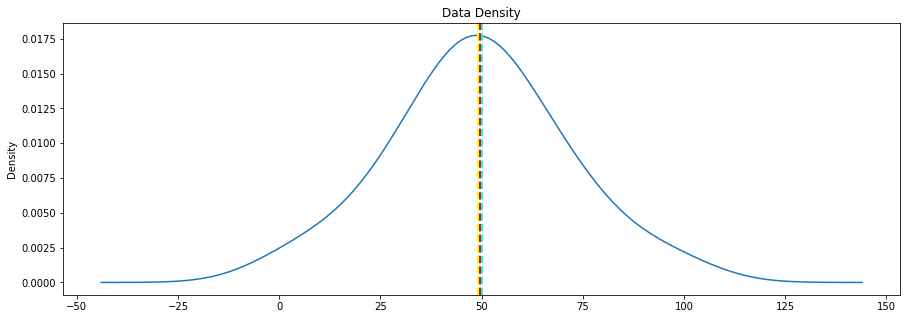

In [160]:
def show_density(var_data):
    fig = plt.figure(figsize=(15,5))

    var_data.plot.density()
    plt.title('Data Density')

    plt.axvline(var_data.mean(),linestyle='--',linewidth=2,color='yellow')
    plt.axvline(var_data.median(),linestyle='--',linewidth=2,color='red')
    plt.axvline(var_data.mode()[0],linestyle='--',linewidth=2,color='cyan')

    plt.show()
show_density(var_data)

Minimum: 1.00
Mean: 10.52
Median: 10.00
Mode: 9.00
Max: 16.00


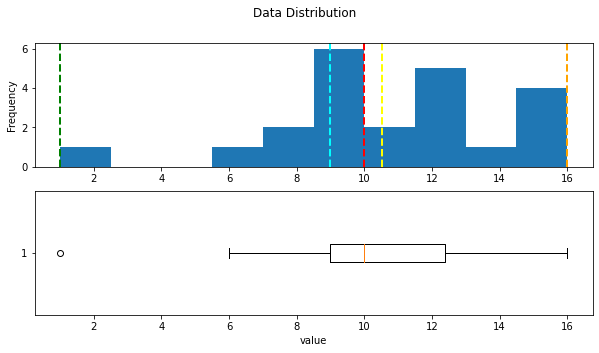

In [161]:
show_distribution(df_students['StudyHours'])

Minimum: 6.00
Mean: 10.98
Median: 10.00
Mode: 9.00
Max: 16.00


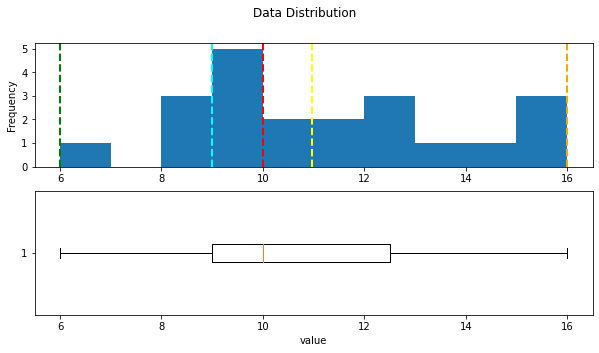

In [162]:
# Students who have studied more than 1 Hour
show_distribution(df_students[df_students['StudyHours']>1]['StudyHours'])

Minimum: 6.00
Mean: 10.98
Median: 10.00
Mode: 9.00
Max: 16.00


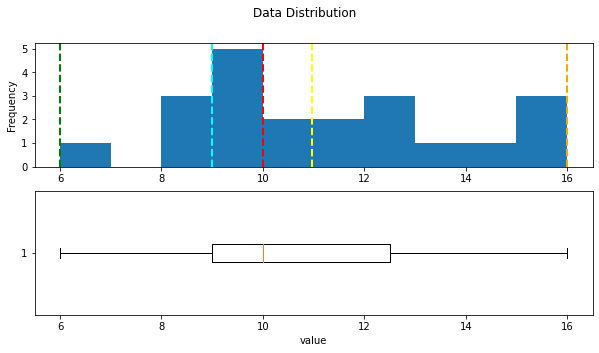

In [163]:
q01 = df_students.StudyHours.quantile(0.01)
show_distribution(df_students[df_students.StudyHours>q01]['StudyHours'])

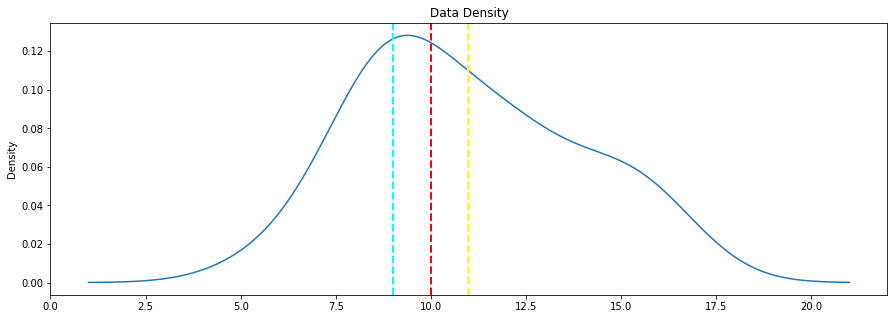

In [164]:
show_density(df_students[df_students.StudyHours>q01]['StudyHours'])

this distribution is called right skewed 

## Measure of Variance  
Calculate:  
    * <i>Range</i> difference between Max and Min  
    * <i>Variance</i>  average of the squared difference of the mean  
    * <i>Standard Deviation</i>  Squared root of Variance

In [171]:
for col_name in ['Grade','StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('{}\nRange: {:.2f}\nVariance: {:.2f}\nStandard Deviation: {:.2f}\n'.format(col_name,rng,var,std))

Grade
Range: 94.00
Variance: 472.54
Standard Deviation: 21.74

StudyHours
Range: 15.00
Variance: 12.16
Standard Deviation: 3.49



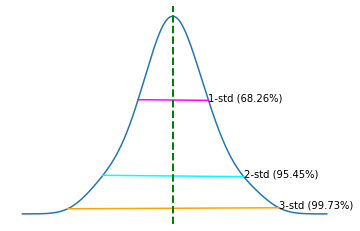

In [186]:
import scipy.stats as stats

fig = plt.figure()
col = df_students['Grade']
col.plot.density()

density = stats.gaussian_kde(col)

mean = df_students['Grade'].mean()
std = df_students['Grade'].std()

x1 = [mean-std, mean+std]
y1 = density(x1)
plt.plot(x1,y1,color='magenta')
plt.annotate('1-std (68.26%)',(x1[1],y1[1]))

x2 = [mean-std*2, mean+std*2]
y2 = density(x2)
plt.plot(x2,y2,color='cyan')
plt.annotate('2-std (95.45%)',(x2[1],y2[1]))

x3 = [mean-std*3, mean+std*3]
y3 = density(x3)
plt.plot(x3,y3,color='orange')
plt.annotate('3-std (99.73%)',(x3[1],y3[1]))

plt.axvline(mean,color='green',linestyle='--',linewidth=2)

plt.axis('off')

plt.show()

## Comparing Data

In [187]:
df_sample = df_students[df_students['StudyHours']>1]

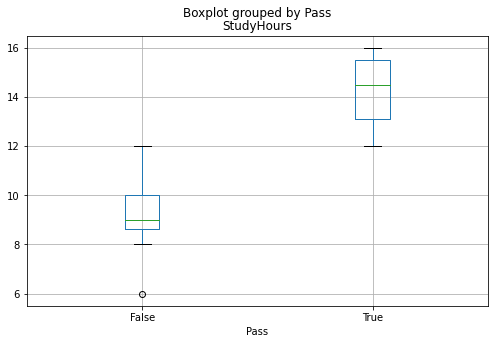

In [192]:
df_sample.boxplot(column='StudyHours',by='Pass',figsize=(8,5))
plt.show()

$\implies$ Students who study longer have higher chances of passing

### Comparing Numericals

<AxesSubplot:xlabel='Name'>

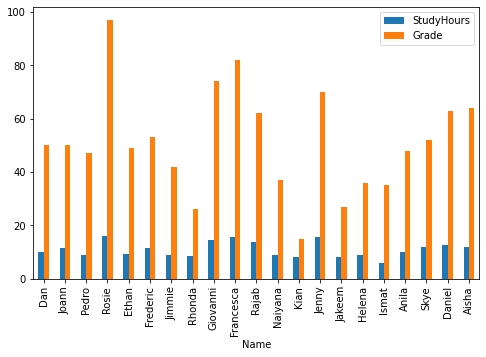

In [197]:
# plt.bar(x='Name',height=['StudyHours','Grade'],data=df_sample)
df_sample.plot(x='Name',y=['StudyHours','Grade'],kind='bar',figsize=(8,5))

$\implies$ its hard to understand the chart as the scales are different

<AxesSubplot:xlabel='Name'>

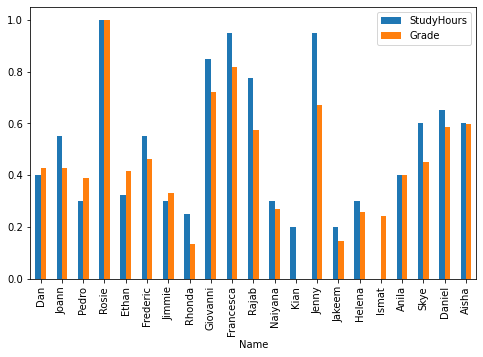

In [198]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalized = df_sample[['Name','StudyHours','Grade']].copy()

df_normalized[['StudyHours','Grade']] = scaler.fit_transform(df_normalized[['StudyHours','Grade']])

df_normalized.plot(x='Name',y=['StudyHours','Grade'],kind='bar',figsize=(8,5))


$\implies$ it supports our assumption that the student who study longer acheive higher grades

Lets calculate the correlation between these two columns

In [199]:
df_sample.StudyHours.corr(df_sample.Grade)

0.9117666413789677

Range of corr() is -1 to 1  
1 $\implies$ high +ve correlation  
-1 $\implies$ high -ve correlation  
0 $\implies$ No correlation

Text(0.5, 1.0, 'StdyHours vs Grade')

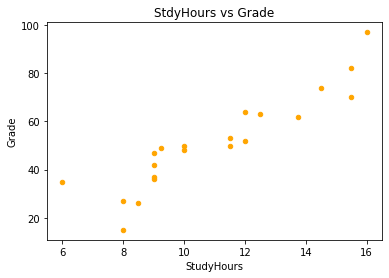

In [208]:
df_sample.plot.scatter(x='StudyHours',y='Grade',color='orange')
plt.title('StdyHours vs Grade')

$\implies$ Positive correlation

Lets try fit a Line to this correlation

slope: 5.77
intercept: -11.52
f(y) = 5.77*x + -11.52


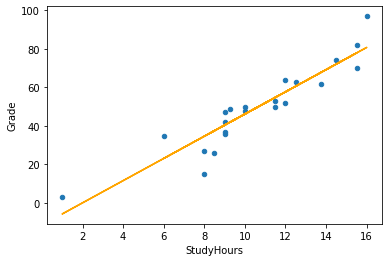

In [219]:
from scipy import stats

df_regression = df_students[['StudyHours','Grade']].copy()

m, b, r, p, se = stats.linregress(df_regression.StudyHours, df_regression.Grade)

print('slope: {:.2f}\nintercept: {:.2f}'.format(m,b))
print('f(y) = {:.2f}*x + {:.2f}'.format(m,b))

df_regression.plot.scatter(x='StudyHours',y='Grade')

x = df_regression.StudyHours
y = m*x + b
plt.plot(x,y,color='orange')

plt.show()

lets calculate the error in the model

In [222]:
df_regression['fx'] = df_regression.StudyHours*m + b
df_regression['error'] = df_regression.fx - df_regression.Grade
df_regression.head()

,StudyHours,Grade,fx,error
0,10.00,50.0,46.166274,-3.833726
1,11.50,50.0,54.819575,4.819575
2,9.00,47.0,40.397406,-6.602594
3,16.00,97.0,80.779481,-16.220519
4,9.25,49.0,41.839623,-7.160377


In [224]:
def f(x,m=m,b=b):
    return m*x + b
#let study time is 14
studytime = 14
prediction = f(studytime)
print('Studying for {} hours per week may result in Grade {:.0f}'.format(studytime,prediction))

Studying for 14 hours per week may result in Grade 69


In [225]:
df = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-illness.csv',delimiter='\t')
df.head()

,male,attended_training,age,body_fat_percentage,core_temperature,ate_at_tonys_steakhouse,needed_intensive_care,protein_content_of_last_meal
0,0,1,6.9,38,38.423169,0,0,7.66
1,0,1,5.4,32,39.015998,0,0,13.36
2,1,1,5.4,12,39.148341,0,0,12.90
3,1,0,4.8,23,39.060049,0,0,13.45
4,1,0,4.8,15,38.655439,0,0,10.53


In [238]:
import plotly.express as px
fig = px.box(data_frame=df,x="male",y="core_temperature");fig.show()
fig = px.box(data_frame=df,x="attended_training",y="core_temperature");fig.show()
fig = px.box(data_frame=df,x="ate_at_tonys_steakhouse",y="core_temperature");fig.show()
fig = px.scatter(data_frame=df,x='age',y='core_temperature');fig.show()
fig = px.scatter(data_frame=df,x='body_fat_percentage',y='core_temperature');fig.show()
fig = px.scatter(data_frame=df,x='protein_content_of_last_meal',y='core_temperature');fig.show()

In [246]:
import statsmodels.formula.api as smf
import plotly.express as px

for col_name in ['male','age','body_fat_percentage','protein_content_of_last_meal']:
    formula = 'core_temperature ~ '+col_name
    smiple_model = smf.ols(formula = formula, data=df).fit()
    
    print(col_name)
    print("R-squared:",smiple_model.rsquared)
fig = px.scatter(df, x="male", y="core_temperature", trendline="ols");fig.show()
fig = px.scatter(df,x='age',y='core_temperature',trendline='ols');fig.show()
fig = px.scatter(df,x='body_fat_percentage',y='core_temperature',trendline='ols');fig.show()
fig = px.scatter(df,x='protein_content_of_last_meal',y='core_temperature',trendline='ols');fig.show()

male
R-squared: 0.0999007443071992
age
R-squared: 0.2648116081342463
body_fat_percentage
R-squared: 0.00020809002637678375
protein_content_of_last_meal
R-squared: 0.9155158150005704


$\implies$ R-square values of 0.0002 (body_fat_percentage), 0.1 (male), and 0.26 (age).

In [248]:
# Let's include only male and age features
model = smf.ols(formula='core_temperature ~ age + male',data=df).fit()
print('R-squared:',model.rsquared)

R-squared: 0.31485126997680113


In [292]:
import plotly.graph_objects as go
import numpy as np

def predict(age,male):
    df_feat = pd.DataFrame(dict(age=[age],male=[male]))
    return model.predict(df_feat)

# Create the surface graph
x_values=np.array([min(df.age), max(df.age)])
y_values=np.array([0, 1])
z = np.zeros((y_values.shape[0], x_values.shape[0]))
for i_x in range(x_values.shape[0]):
    for i_y in range(y_values.shape[0]):
        z[i_y,i_x] = predict(x_values[i_x],y_values[i_y])
    
# Create a graph of cost
fig = go.Figure(
    data=[go.Surface(x=x_values, y=y_values, z=z)])
fig.update_layout(title=None,
                      scene_xaxis_title='Age',
                      scene_yaxis_title='Male',
                      scene_zaxis_title='Core temperature')

# Add z-axis as colourbar title
fig.update_traces(colorbar_title_text='Core temperature',
                    selector=dict(type='surface'))

fig.add_scatter3d(x=df.age,y=df.male,z=df.core_temperature,mode='markers');
fig.show()

### Inspecting the model

In [293]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       core_temperature   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     21.83
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           1.58e-08
Time:                        03:21:30   Log-Likelihood:                -85.295
No. Observations:                  98   AIC:                             176.6
Df Residuals:                      95   BIC:                             184.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.9793      0.135    282.094      0.000      37.712      38.247
age            0.1406      0.026      5.459      0.000       0.089       0.192
male           0.3182      0.121      2.634      0.010       0.078       0.558
==============================================================================
Omnibus:                       21.610   Durbin-Watson:                   2.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.227
Skew:                           0.121   Prob(JB):                       0.0733
Kurtosis:                       1.895   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Intercept $\implies$ the minimum temperature of $38^\circ C$ when $male=0 \&  age=0$  
Here age coefficient is 0.14 $\implies$ for every $1$ year increase in age results in $0.14^\circ C$ temperature increase  
Similarly, male coefficient 0.32 $\implies$ male dogs have $0.32^\circ C$ more than the female dogs  
  
<b>P</b> column is also very useful. This tells us how confident the model is about this parameter value. As a rule of thumb, if the <b>p</b> value is less than <b>0.05</b>, there is a good chance that this relationship if <b>trustable</b>. For example, here both age and male are less than 0.05, so we should feel confident using this model in the real world.

In [294]:
formula = "core_temperature ~ age"
age_trained_model = smf.ols(formula = formula, data = df).fit()
age_trained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       core_temperature   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     34.58
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           5.94e-08
Time:                        03:45:00   Log-Likelihood:                -88.749
No. Observations:                  98   AIC:                             181.5
Df Residuals:                      96   BIC:                             186.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.0879      0.132    288.373      0.000      37.826      38.350
age            0.1533      0.026      5.880      0.000       0.102       0.205
==============================================================================
Omnibus:                       43.487   Durbin-Watson:                   2.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.605
Skew:                           0.087   Prob(JB):                       0.0368
Kurtosis:                       1.740   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'linear eqn with no bends')

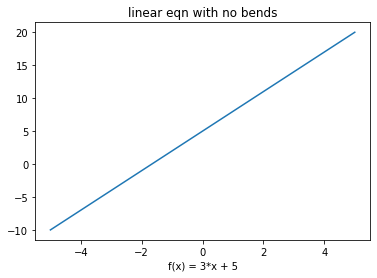

In [78]:
import matplotlib.pyplot as plt
a=3;b=5
x_values = np.linspace(-5,5,100)
calc_y = lambda x: a*x + b
y_values = calc_y(x_values)
plt.plot(x_values,y_values)
plt.xlabel('f(x) = 3*x + 5')
plt.title('linear eqn with no bends')

Text(0.5, 1.0, 'polynomial with one bend')

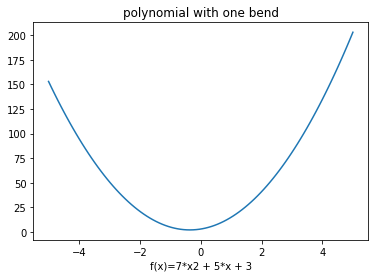

In [70]:
import matplotlib.pyplot as plt
intercept=3;B1=5;B2=7
x_values = np.linspace(-5,5,100)
calc_y = lambda x: intercept + B1*x + B2 * (x**2)
y_values = calc_y(x_values)
plt.plot(x_values,y_values)
plt.xlabel('f(x)=7*x2 + 5*x + 3')
plt.title('polynomial with one bend')

Text(0.5, 0, 'f(x)= 8*x3 + 7*x2 + 5*x + 3')

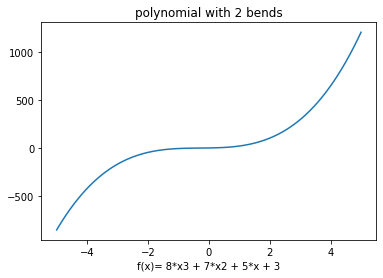

In [69]:
import matplotlib.pyplot as plt
intercept=3;B1=5;B2=7;B3=8
x_values = np.linspace(-5,5,100)
calc_y = lambda x: intercept + B1*x + B2 * x**2 + B3 * x**3
y_values = calc_y(x_values)
plt.plot(x_values,y_values)
plt.title('polynomial with 2 bends')
plt.xlabel('f(x)= 8*x3 + 7*x2 + 5*x + 3')

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-illness.csv',delimiter = '\t')
df.head()

,male,attended_training,age,body_fat_percentage,core_temperature,ate_at_tonys_steakhouse,needed_intensive_care,protein_content_of_last_meal
0,0,1,6.9,38,38.423169,0,0,7.66
1,0,1,5.4,32,39.015998,0,0,13.36
2,1,1,5.4,12,39.148341,0,0,12.90
3,1,0,4.8,23,39.060049,0,0,13.45
4,1,0,4.8,15,38.655439,0,0,10.53


In [5]:
import plotly.express as px
fig = px.box(df,y=['body_fat_percentage','protein_content_of_last_meal']);fig.show()

## Simple Linear Regression

In [41]:
import statsmodels.formula.api as smf
import plotly.express as px
import numpy as np
from typing import Dict, Optional, Callable, Tuple, Union, List

colours_trendline = px.colors.qualitative.Set1

simple_formula = 'core_temperature ~ protein_content_of_last_meal'
simple_model = smf.ols(formula=simple_formula,data=df).fit()

fig = px.scatter(df
                 ,x='protein_content_of_last_meal'
                 ,y='core_temperature'
                 ,labels={'protein_content_of_last_meal':'last meal protein content'
                          ,'core_temperature':'core temperature'}
                 ,hover_data=['body_fat_percentage']
                 ,title='Simple Model')

size_multiplier=1
size = int((round(22.0 - 19/(1+np.exp(-(df.shape[0]/100-2)))) * size_multiplier))
fig.update_traces(marker={'size': size})

trendline=lambda x: simple_model.params[1] * x + simple_model.params[0]
trendline = [trendline]
x_min = min(df['protein_content_of_last_meal'])
x_max = max(df['protein_content_of_last_meal'])
evaluate_for = np.linspace(x_min, x_max, num=200)
shapes = []
for t, colour in zip(trendline, colours_trendline):
    y_vals = t(evaluate_for)
    path = "M" + " L ".join([str(c[0]) + " " + str(c[1])
                                for c in zip(evaluate_for, y_vals)])
    print(path[:70])
    shapes.append(dict(
            type="path",
            path=path,
            line_color=colour,
        )
        )
fig.update_layout(shapes=shapes)

fig.show()

M3.93 37.7136142892452 L 4.043969849246231 37.728236791121105 L 4.1579


In [37]:
print("R-squared:", simple_model.rsquared)

R-squared: 0.9155158150005704


## Simple Polynomial Regression

In [40]:
import statsmodels.formula.api as smf
import plotly.express as px
import numpy as np
from typing import Dict, Optional, Callable, Tuple, Union, List

colours_trendline = px.colors.qualitative.Set1

polynomial_formula = "core_temperature ~ protein_content_of_last_meal + I(protein_content_of_last_meal**2)"
polynomial_model = smf.ols(formula=polynomial_formula,data=df).fit()

fig = px.scatter(df
                 ,x='protein_content_of_last_meal'
                 ,y='core_temperature'
                 ,labels={'protein_content_of_last_meal':'last meal protein content'
                          ,'core_temperature':'core temperature'}
                 ,hover_data=['body_fat_percentage']
                 ,title='Polynomial Model')

size_multiplier=1
size = int((round(22.0 - 19/(1+np.exp(-(df.shape[0]/100-2)))) * size_multiplier))
fig.update_traces(marker={'size': size})

trendline=lambda x: polynomial_model.params[2] * x**2 + polynomial_model.params[1] * x + polynomial_model.params[0]
trendline = [trendline]
x_min = min(df['protein_content_of_last_meal'])
x_max = max(df['protein_content_of_last_meal'])
evaluate_for = np.linspace(x_min, x_max, num=200)
shapes = []
for t, colour in zip(trendline, colours_trendline):
    y_vals = t(evaluate_for)
    path = "M" + " L ".join([str(c[0]) + " " + str(c[1])
                                for c in zip(evaluate_for, y_vals)])
    print(path[:70])
    shapes.append(dict(
            type="path",
            path=path,
            line_color=colour,
        )
        )
fig.update_layout(shapes=shapes)

fig.show()

M3.93 37.406961099510816 L 4.043969849246231 37.43148503260296 L 4.157


In [42]:
print("R-squared:", polynomial_model.rsquared)

R-squared: 0.951442606991169


In [44]:
import plotly.graph_objects as go
import numpy as np

# Create the surface graph
x_values=np.array([min(df.protein_content_of_last_meal), max(df.protein_content_of_last_meal)])
y_values=np.array([min(df.protein_content_of_last_meal)**2, max(df.protein_content_of_last_meal)**2])
calcz=lambda x,y: polynomial_model.params[0] + (polynomial_model.params[1] * x) + (polynomial_model.params[2] * y)
z = np.zeros((y_values.shape[0], x_values.shape[0]))
for i_x in range(x_values.shape[0]):
    for i_y in range(y_values.shape[0]):
        z[i_y,i_x] = calcz(x_values[i_x],y_values[i_y])
    
# Create a graph of cost
fig = go.Figure(
    data=[go.Surface(x=x_values, y=y_values, z=z)])
fig.update_layout(title=None,
                      scene_xaxis_title='x',
                      scene_yaxis_title='x2',
                      scene_zaxis_title='Core temperature')

# Add z-axis as colourbar title
fig.update_traces(colorbar_title_text='Core temperature',
                    selector=dict(type='surface'))

fig.add_scatter3d(x=df.protein_content_of_last_meal,y=df.protein_content_of_last_meal**2,z=df.core_temperature,mode='markers')
fig.show()

## Extrapolating

In [45]:
import statsmodels.formula.api as smf
import plotly.express as px
import numpy as np
from typing import Dict, Optional, Callable, Tuple, Union, List

colours_trendline = px.colors.qualitative.Set1

simple_formula = 'core_temperature ~ protein_content_of_last_meal'
simple_model = smf.ols(formula=simple_formula,data=df).fit()

fig = px.scatter(df
                 ,x='protein_content_of_last_meal'
                 ,y='core_temperature'
                 ,labels={'protein_content_of_last_meal':'last meal protein content'
                          ,'core_temperature':'core temperature'}
                 ,hover_data=['body_fat_percentage']
                 ,title='Simple Model')

size_multiplier=1
size = int((round(22.0 - 19/(1+np.exp(-(df.shape[0]/100-2)))) * size_multiplier))
fig.update_traces(marker={'size': size})

trendline=lambda x: simple_model.params[1] * x + simple_model.params[0]
trendline = [trendline]
x_min = 0
x_max = 100
evaluate_for = np.linspace(x_min, x_max, num=200)
shapes = []
for t, colour in zip(trendline, colours_trendline):
    y_vals = t(evaluate_for)
    path = "M" + " L ".join([str(c[0]) + " " + str(c[1])
                                for c in zip(evaluate_for, y_vals)])
    print(path[:70])
    shapes.append(dict(
            type="path",
            path=path,
            line_color=colour,
        )
        )
fig.update_layout(shapes=shapes)

fig.show()

M0.0 37.20938941966435 L 0.5025125628140703 37.273862531991995 L 1.005


In [46]:
import statsmodels.formula.api as smf
import plotly.express as px
import numpy as np
from typing import Dict, Optional, Callable, Tuple, Union, List

colours_trendline = px.colors.qualitative.Set1

polynomial_formula = "core_temperature ~ protein_content_of_last_meal + I(protein_content_of_last_meal**2)"
polynomial_model = smf.ols(formula=polynomial_formula,data=df).fit()

fig = px.scatter(df
                 ,x='protein_content_of_last_meal'
                 ,y='core_temperature'
                 ,labels={'protein_content_of_last_meal':'last meal protein content'
                          ,'core_temperature':'core temperature'}
                 ,hover_data=['body_fat_percentage']
                 ,title='Polynomial Model')

size_multiplier=1
size = int((round(22.0 - 19/(1+np.exp(-(df.shape[0]/100-2)))) * size_multiplier))
fig.update_traces(marker={'size': size})

trendline=lambda x: polynomial_model.params[2] * x**2 + polynomial_model.params[1] * x + polynomial_model.params[0]
trendline = [trendline]
x_min = 0
x_max = 100
evaluate_for = np.linspace(x_min, x_max, num=200)
shapes = []
for t, colour in zip(trendline, colours_trendline):
    y_vals = t(evaluate_for)
    path = "M" + " L ".join([str(c[0]) + " " + str(c[1])
                                for c in zip(evaluate_for, y_vals)])
    print(path[:70])
    shapes.append(dict(
            type="path",
            path=path,
            line_color=colour,
        )
        )
fig.update_layout(shapes=shapes)

fig.show()

M0.0 36.49204572287682 L 0.5025125628140703 36.616538188538186 L 1.005


Note: The extrapolate results of the polynomial excpects the core-temperature to drop while the linear regression expects it to be linear (go up) but in truth protien is not a coolent agent here  
In general extrapolate results of a polynomial are not recommended

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv')
df['day']=pd.DatetimeIndex(df['dteday']).day
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


## Data Distribution

Minimum: 2.00
Mean: 848.18
Median: 713.00
Mode: 120.00
Max: 3410.00


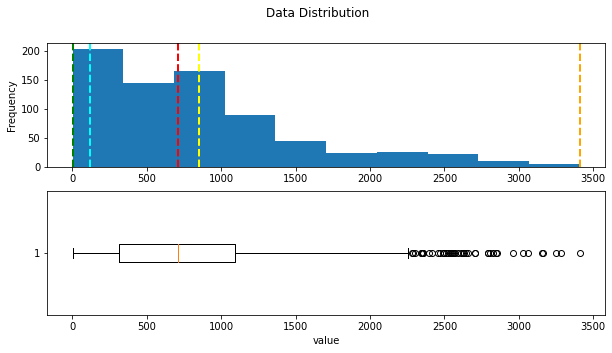

In [5]:
show_distribution(df['rentals'])

### Multiple Histograms

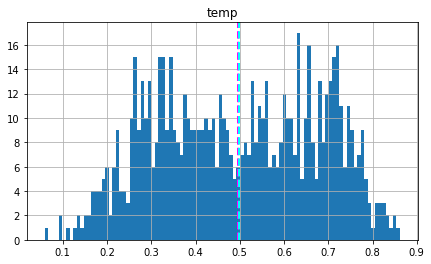

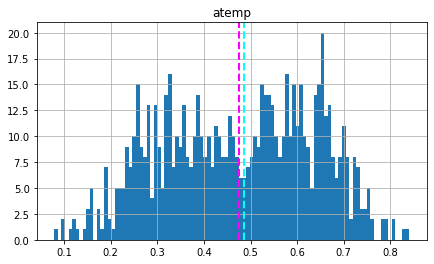

In [6]:
# Plot a histogram for each numeric feature
numeric_features = ['temp', 'atemp'#, 'hum', 'windspeed'
                    ]
for col in numeric_features:
    fig = plt.figure(figsize=(7, 4))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

### Multiple Bar plots

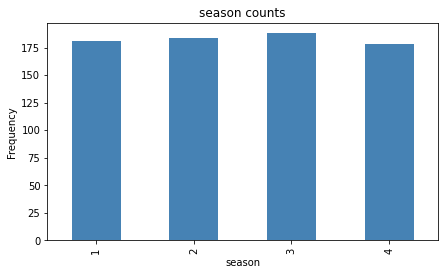

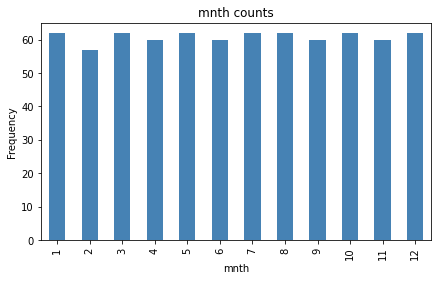

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# plot a bar plot for each categorical feature count
categorical_features = ['season','mnth'#,'holiday','weekday','workingday','weathersit', 'day'\
    ]

for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(7, 4))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()


### Multiple Scatter plots

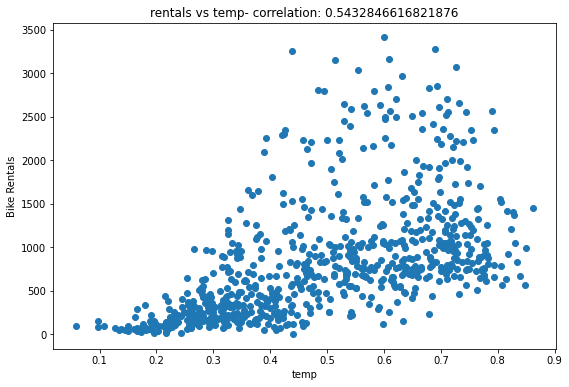

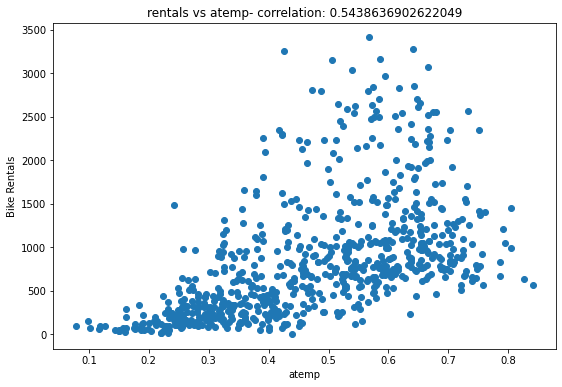

In [8]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()

### Multiple Box plots

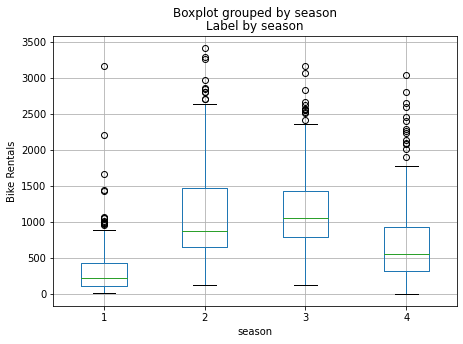

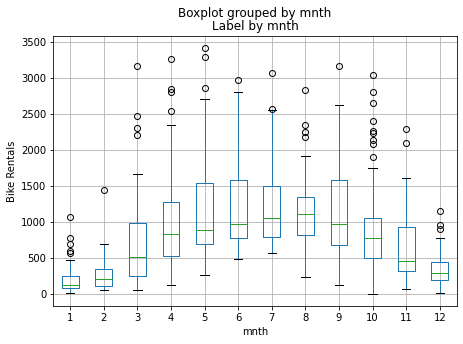

In [9]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(7, 5))
    ax = fig.gca()
    df.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
features = ['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']
X = df[features]
y = df['rentals']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=101)

## OLS Regression

MSE: 169656.46586838848
RMSE: 411.89375555886795
R2: 0.618173222371326


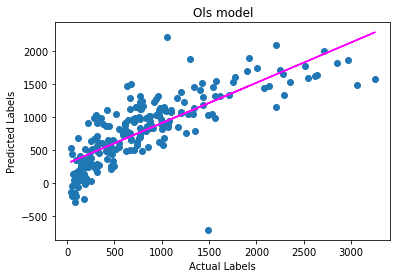

In [43]:
import statsmodels.formula.api as smf
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# formula = 'rentals ~ season + mnth +  holiday + weekday + workingday + weathersit + temp +  atemp +  hum +  windspeed'
formula = 'rentals ~ '
for feature in features:
    formula += '+ '+feature
model = smf.ols(formula=formula, data=pd.concat([X_train,y_train],axis=1)).fit()

calc_pred = lambda x1,x2,x3,x4,x5,x6,x7,x8,x9,x10: \
        model.params[0] \
        + model.params[1]*x1\
        + model.params[2]*x2\
        + model.params[3]*x3\
        + model.params[4]*x4\
        + model.params[5]*x5\
        + model.params[6]*x6\
        + model.params[7]*x7\
        + model.params[8]*x8\
        + model.params[9]*x9\
        + model.params[10]*x10
predictions = calc_pred(X_test[features[0]],X_test[features[1]],X_test[features[2]],X_test[features[3]]
                        ,X_test[features[4]],X_test[features[5]],X_test[features[6]],X_test[features[7]]\
                        ,X_test[features[8]],X_test[features[9]])

# Evaluate the model using the test data
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

plt.scatter(y_test,predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Ols model')

z = np.polyfit(y_test,predictions,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')

## Lasso Regression

MSE: 156225.11945702237
RMSE: 395.2532345940035
R2: 0.6484016471661982


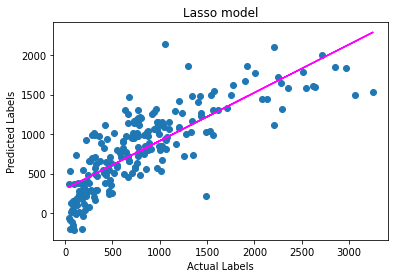

In [41]:
from sklearn.linear_model import Lasso

model = Lasso().fit(X_train, y_train)

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Lasso model')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Decision Tree Regression

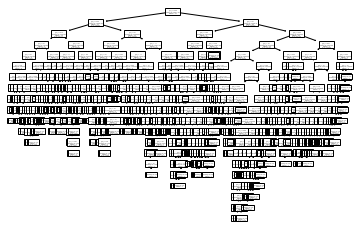

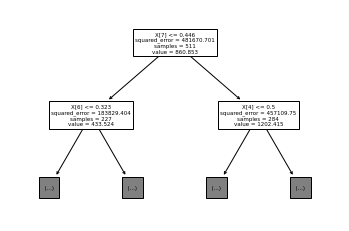

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text,plot_tree

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
plot_tree(model);plt.show()
plot_tree(model,max_depth=1)
plt.show()

MSE: 182007.31818181818
RMSE: 426.62315710919654
R2: 0.5903765444453407


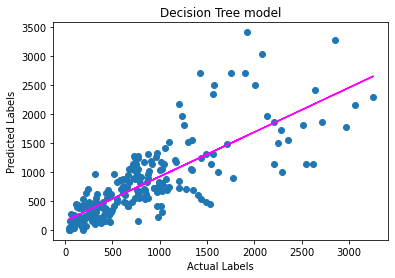

In [46]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Decision Tree model')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Random Forest Regression

MSE: 98781.872535
RMSE: 314.29583601282405
R2: 0.7776827196941319


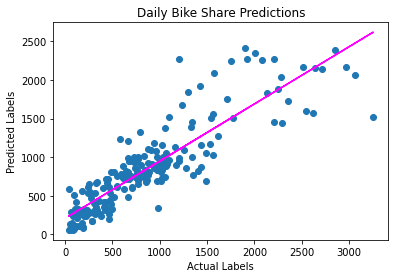

In [47]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## [Gradient Boosting Regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

MSE: 99115.96684365455
RMSE: 314.82688392774617
R2: 0.776930811108481


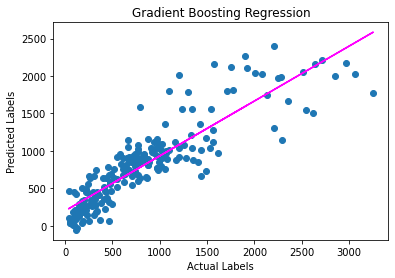

In [48]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Gradient Boosting Regression')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## GridSearchCV

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 

GradientBoostingRegressor() 

MSE: 100183.59470359601
RMSE: 316.5179216151844
R2: 0.7745280208382634


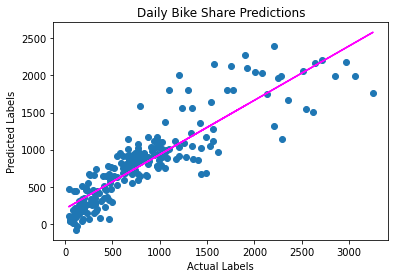

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Pipeline

In [50]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


MSE: 93337.39775852727
RMSE: 305.5116982351531
R2: 0.7899359883752906


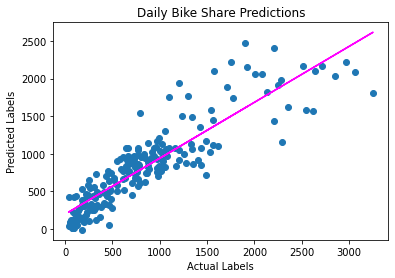

In [51]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 

MSE: 101761.4999809091
RMSE: 319.00078366817394
R2: 0.7709768064217901


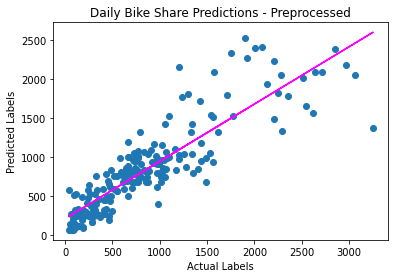

In [52]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Save and load Model

In [53]:
# Save model
import joblib

# Save the model as a pickle file
filename = './bike-share.pkl'
joblib.dump(model, filename)

['./bike-share.pkl']

In [54]:
# Load & predict
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 113 rentals


C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  "X does not have valid feature names, but"


In [55]:
# Batch predictions
# An array of features based on five-day weather forecast
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))

5-day rental predictions:
590.0
565.0
212.0
136.0
208.0


C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  "X does not have valid feature names, but"
